In [1]:
#librarys
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries



In [2]:
key = 'M1VXGBGEA8QLPLUF'


In [3]:
ts = TimeSeries(key,output_format="pandas")
data1, TSLA = ts.get_intraday('TSLA',interval="60min",outputsize="full")
data2, GOOG = ts.get_intraday('GOOG',interval="60min",outputsize="full")
data3, AAPL = ts.get_intraday('AAPL',interval="60min",outputsize="full")
data4, AMZN = ts.get_intraday('AMZN',interval="60min",outputsize="full")
data5, META = ts.get_intraday('META',interval="60min",outputsize="full")


In [4]:
#check the data
TSLA

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2022-11-16 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [5]:
data1.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 656 entries, 2022-11-16 20:00:00 to 2022-09-21 05:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    656 non-null    float64
 1   2. high    656 non-null    float64
 2   3. low     656 non-null    float64
 3   4. close   656 non-null    float64
 4   5. volume  656 non-null    float64
dtypes: float64(5)
memory usage: 30.8 KB


In [6]:
data3.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-11-16 20:00:00,149.180,149.19,148.8500,148.90,30216.0
2022-11-16 19:00:00,148.850,149.18,148.8500,149.17,18940.0
2022-11-16 18:00:00,148.800,148.88,148.7324,148.88,47997.0
2022-11-16 17:00:00,148.830,149.38,148.6000,148.76,2347403.0
2022-11-16 16:00:00,149.037,149.25,148.3550,148.78,9008609.0


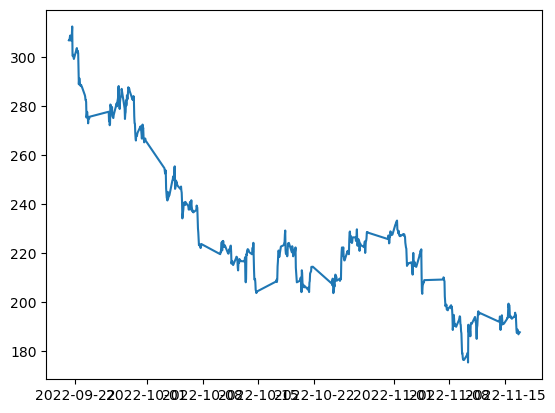

In [7]:
plt.plot(data1["4. close"])

In [8]:
# rename the data

columns = ["open","high","low","close","volume"]
data1.columns = columns
data2.columns = columns
data3.columns = columns
data4.columns = columns
data5.columns = columns


In [9]:
data1["TradeDate"] = data1.index.date
data1["time"] = data1.index.time

data2["TradeDate"] = data2.index.date
data2["time"] = data2.index.time

data3["TradeDate"] = data3.index.date
data3["time"] = data3.index.time

data4["TradeDate"] = data4.index.date
data4["time"] = data4.index.time

data5["TradeDate"] = data5.index.date
data5["time"] = data5.index.time


In [10]:
data1.loc["2022-11-08"].head(10)
data2.loc["2022-11-08"].head(10)
data3.loc["2022-11-08"].head(10)
data4.loc["2022-11-08"].head(10)
data5.loc["2022-11-08"].head(10)



,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-11-08 20:00:00,96.900,96.95,96.630,96.8500,34505.0,2022-11-08,20:00:00
2022-11-08 19:00:00,96.700,96.93,96.620,96.9000,22664.0,2022-11-08,19:00:00
2022-11-08 18:00:00,96.800,96.94,96.600,96.6814,52776.0,2022-11-08,18:00:00
2022-11-08 17:00:00,96.470,96.85,96.360,96.8500,1553776.0,2022-11-08,17:00:00
2022-11-08 16:00:00,95.485,96.90,95.420,96.4800,7337569.0,2022-11-08,16:00:00
2022-11-08 15:00:00,96.010,96.33,94.790,95.4900,6543176.0,2022-11-08,15:00:00
2022-11-08 14:00:00,97.410,97.80,95.890,96.0200,6561207.0,2022-11-08,14:00:00
2022-11-08 13:00:00,95.815,97.57,95.815,97.4000,6043764.0,2022-11-08,13:00:00
2022-11-08 12:00:00,95.420,96.50,95.380,95.8200,5380445.0,2022-11-08,12:00:00


In [11]:
#set a limit to trading times
market1 = data1.between_time("09:30:00","16:00:00").copy()
market1.sort_index(inplace=True)
market1.info()
#data is also 8 days worth
#set a limit to trading times
market2 = data2.between_time("09:30:00","16:00:00").copy()
market2.sort_index(inplace=True)
market2.info()
#data is also 8 days worth
#set a limit to trading times
market3 = data3.between_time("09:30:00","16:00:00").copy()
market3.sort_index(inplace=True)
market3.info()
#data is also 8 days worth
#set a limit to trading times
market4 = data4.between_time("09:30:00","16:00:00").copy()
market4.sort_index(inplace=True)
market4.info()
#data is also 8 days worth
#set a limit to trading times
market5 = data5.between_time("09:30:00","16:00:00").copy()
market5.sort_index(inplace=True)
market5.info()
#data is also 8 days worth


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2022-09-21 10:00:00 to 2022-11-16 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       287 non-null    float64
 1   high       287 non-null    float64
 2   low        287 non-null    float64
 3   close      287 non-null    float64
 4   volume     287 non-null    float64
 5   TradeDate  287 non-null    object 
 6   time       287 non-null    object 
dtypes: float64(5), object(2)
memory usage: 17.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2022-09-21 10:00:00 to 2022-11-16 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       287 non-null    float64
 1   high       287 non-null    float64
 2   low        287 non-null    float64
 3   close      287 non-null    float64
 4   volume     287 non-null    float64
 5   TradeDate  287 non-n

In [12]:
market1.groupby("TradeDate").agg({"low":min,"high":max})
market2.groupby("TradeDate").agg({"low":min,"high":max})
market3.groupby("TradeDate").agg({"low":min,"high":max})
market4.groupby("TradeDate").agg({"low":min,"high":max})
market5.groupby("TradeDate").agg({"low":min,"high":max})

,low,high
TradeDate,,
2022-09-21,142.0000,149.6000
2022-09-22,140.8700,144.5800
2022-09-23,138.8900,142.6200
2022-09-26,136.1900,142.2400
2022-09-27,134.1201,139.4200
2022-09-28,134.1100,142.0300
2022-09-29,135.2000,139.8400
2022-09-30,135.5000,140.9900
2022-10-03,136.1000,139.6200


In [13]:
market1.loc[market1.groupby("TradeDate")['low'].idxmin()]
market2.loc[market2.groupby("TradeDate")['low'].idxmin()]
market3.loc[market3.groupby("TradeDate")['low'].idxmin()]
market4.loc[market4.groupby("TradeDate")['low'].idxmin()]
market5.loc[market5.groupby("TradeDate")['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-21 16:00:00,147.6300,147.9700,142.0000,142.0800,7302517.0,2022-09-21,16:00:00
2022-09-22 12:00:00,141.8450,142.8800,140.8700,142.5200,4161852.0,2022-09-22,12:00:00
2022-09-23 15:00:00,140.0200,140.6600,138.8900,139.0000,5247640.0,2022-09-23,15:00:00
2022-09-26 16:00:00,138.1906,138.6200,136.1900,136.3500,6160923.0,2022-09-26,16:00:00
2022-09-27 14:00:00,135.2500,135.2700,134.1201,134.7000,3179871.0,2022-09-27,14:00:00
2022-09-28 10:00:00,134.7114,136.9500,134.1100,136.3300,4757542.0,2022-09-28,10:00:00
2022-09-29 15:00:00,136.2600,136.8500,135.2000,135.6550,5748696.0,2022-09-29,15:00:00
2022-09-30 16:00:00,136.7100,137.3600,135.5000,135.6800,6180810.0,2022-09-30,16:00:00
2022-10-03 12:00:00,137.5500,137.8200,136.1000,136.4700,3865579.0,2022-10-03,12:00:00


In [14]:
market1.loc[market1.groupby("TradeDate")['high'].idxmax()]
market2.loc[market2.groupby("TradeDate")['high'].idxmax()]
market3.loc[market3.groupby("TradeDate")['high'].idxmax()]
market4.loc[market4.groupby("TradeDate")['high'].idxmax()]
market5.loc[market5.groupby("TradeDate")['high'].idxmax()]


,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2022-09-21 15:00:00,146.7700,149.6000,142.8000,147.5500,9452733.0,2022-09-21,15:00:00
2022-09-22 16:00:00,143.5100,144.5800,142.6800,142.7900,4820507.0,2022-09-22,16:00:00
2022-09-23 10:00:00,141.0000,142.6200,139.6000,139.6710,3974835.0,2022-09-23,10:00:00
2022-09-26 10:00:00,140.3000,142.2400,139.5300,141.5700,3521587.0,2022-09-26,10:00:00
2022-09-27 10:00:00,138.2500,139.4200,137.0700,137.6400,4031663.0,2022-09-27,10:00:00
2022-09-28 16:00:00,141.0300,142.0300,140.9200,141.5900,5151784.0,2022-09-28,16:00:00
2022-09-29 10:00:00,139.1000,139.8400,137.2800,137.7300,3887306.0,2022-09-29,10:00:00
2022-09-30 12:00:00,140.1900,140.9900,139.1000,139.2200,4097681.0,2022-09-30,12:00:00
2022-10-03 16:00:00,139.2000,139.6200,138.3575,138.6350,4290014.0,2022-10-03,16:00:00


In [15]:
high_price1 = market1["high"].mean()
high_price2 = market2["high"].mean()
high_price3 = market3["high"].mean()
high_price4 = market4["high"].mean()
high_price5 = market5["high"].mean()


In [16]:
low_price1 = market1["low"].mean()
low_price2 = market2["low"].mean()
low_price3 = market3["low"].mean()
low_price4 = market4["low"].mean()
low_price5 = market5["low"].mean()


In [17]:
daily_max1 = float(market1["high"].max())
daily_low1 = float(market1["low"].min())
daily_max2 = float(market2["high"].max())
daily_low2 = float(market2["low"].min())
daily_max3 = float(market3["high"].max())
daily_low3 = float(market3["low"].min())
daily_max4 = float(market4["high"].max())
daily_low4 = float(market4["low"].min())
daily_max5 = float(market5["high"].max())
daily_low5 = float(market5["low"].min())

In [18]:
open_price1 = market1["open"][0]
close_price1 = market1['close'][0]
open_price2 = market2["open"][0]
close_price2 = market2['close'][0]
open_price3 = market3["open"][0]
close_price3 = market3['close'][0]
open_price4 = market4["open"][0]
close_price4 = market4['close'][0]
open_price5 = market5["open"][0]
close_price5 = market5['close'][0]



In [19]:
percentage_change1 = abs((open_price1 - close_price1)/close_price1 * 100)
percentage_change2 = abs((open_price2 - close_price2)/close_price2 * 100)
percentage_change3 = abs((open_price3 - close_price3)/close_price3 * 100)
percentage_change4 = abs((open_price4 - close_price4)/close_price4 * 100)
percentage_change5 = abs((open_price5 - close_price5)/close_price5 * 100)

In [20]:
float(high_price1)
float(low_price1)
float(high_price2)
float(low_price2)
float(high_price3)
float(low_price3)
float(high_price4)
float(low_price4)
float(high_price5)
float(low_price5)


121.88800801393728

In [21]:
my_data1 = pd.DataFrame(data={
    "Stock Name": "TSLA",
    "Daily High": f'{high_price1:.2f}', 
    "Daily Low": f'{low_price1:.2f}',
    "Daily Max Price": [daily_max1],
    "Daily Low Price": [daily_low1],
    "Daily Open Price": [open_price1],
    "Daily Close Price": f'{close_price1:.2f}',
    "Daily Percentage Change": f"% {percentage_change1:.2f}"
})
my_data1

,Stock Name,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,TSLA,230.77,226.44,313.8,177.12,308.86,307.83,% 0.33


In [22]:
my_data2 = pd.DataFrame(data={
    "Stock Name": "GOOG",
    "Daily High": f'{high_price2:.2f}', 
    "Daily Low": f'{low_price2:.2f}',
    "Daily Max Price": [daily_max2],
    "Daily Low Price": [daily_low2],
    "Daily Open Price": [open_price2],
    "Daily Close Price": f'{close_price2:.2f}',
    "Daily Percentage Change": f"% {percentage_change2:.2f}"
})
my_data2

,Stock Name,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,GOOG,97.70,96.63,105.0999,83.45,102.25,102.08,% 0.17


In [23]:
my_data3 = pd.DataFrame(data={
    "Stock Name": "AAPL",
    "Daily High": f'{high_price3:.2f}', 
    "Daily Low": f'{low_price3:.2f}',
    "Daily Max Price": [daily_max3],
    "Daily Low Price": [daily_low3],
    "Daily Open Price": [open_price3],
    "Daily Close Price": f'{close_price3:.2f}',
    "Daily Percentage Change": f"% {percentage_change3:.2f}"
})
my_data3

,Stock Name,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,AAPL,146.11,144.48,158.4766,133.6578,157.0789,156.77,% 0.20


In [24]:
my_data4 = pd.DataFrame(data={
    "Stock Name": "AMZN",
    "Daily High": f'{high_price4:.2f}', 
    "Daily Low": f'{low_price4:.2f}',
    "Daily Max Price": [daily_max4],
    "Daily Low Price": [daily_low4],
    "Daily Open Price": [open_price4],
    "Daily Close Price": f'{close_price4:.2f}',
    "Daily Percentage Change": f"% {percentage_change4:.2f}"
})
my_data4

,Stock Name,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,AMZN,109.70,108.07,123.76,85.87,122.6,122.06,% 0.44


In [25]:
my_data5 = pd.DataFrame(data={
    "Stock Name": "META",
    "Daily High": f'{high_price5:.2f}', 
    "Daily Low": f'{low_price5:.2f}',
    "Daily Max Price": [daily_max5],
    "Daily Low Price": [daily_low5],
    "Daily Open Price": [open_price5],
    "Daily Close Price": f'{close_price5:.2f}',
    "Daily Percentage Change": f"% {percentage_change5:.2f}"
})
my_data5

,Stock Name,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,META,123.80,121.89,149.6,88.09,146.89,144.51,% 1.65


In [26]:
stock_data = [my_data1,my_data2,my_data3,my_data4,my_data5]
result = pd.concat(stock_data)
display(result)

,Stock Name,Daily High,Daily Low,Daily Max Price,Daily Low Price,Daily Open Price,Daily Close Price,Daily Percentage Change
0,TSLA,230.77,226.44,313.8000,177.1200,308.8600,307.83,% 0.33
0,GOOG,97.70,96.63,105.0999,83.4500,102.2500,102.08,% 0.17
0,AAPL,146.11,144.48,158.4766,133.6578,157.0789,156.77,% 0.20
0,AMZN,109.70,108.07,123.7600,85.8700,122.6000,122.06,% 0.44
0,META,123.80,121.89,149.6000,88.0900,146.8900,144.51,% 1.65


In [27]:
final = result.to_html()
print(final)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Stock Name</th>
      <th>Daily High</th>
      <th>Daily Low</th>
      <th>Daily Max Price</th>
      <th>Daily Low Price</th>
      <th>Daily Open Price</th>
      <th>Daily Close Price</th>
      <th>Daily Percentage Change</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>TSLA</td>
      <td>230.77</td>
      <td>226.44</td>
      <td>313.8000</td>
      <td>177.1200</td>
      <td>308.8600</td>
      <td>307.83</td>
      <td>% 0.33</td>
    </tr>
    <tr>
      <th>0</th>
      <td>GOOG</td>
      <td>97.70</td>
      <td>96.63</td>
      <td>105.0999</td>
      <td>83.4500</td>
      <td>102.2500</td>
      <td>102.08</td>
      <td>% 0.17</td>
    </tr>
    <tr>
      <th>0</th>
      <td>AAPL</td>
      <td>146.11</td>
      <td>144.48</td>
      <td>158.4766</td>
      <td>133.6578</td>
      <td>157.0789</td>
      <td>156.77</td>
      <td>% 0.

In [28]:
text_file = open("data.html", "w")
text_file.write(final)
text_file.close()